In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from sympy import init_printing
%matplotlib inline
init_printing()

In [2]:
# Modifying the plot style
style.use('seaborn')

## Part I - Compare sensor models in same conditions of temperature (~24°C)

In [3]:
#Import data files for long-term test in air conditioning = 24°C (nominal)

#135-14
_135_longterm_ON_air = pd.read_csv('sensor_13514_air_ON_temp.txt', sep='\t', header=0)

#133-14
_133_longterm_ON_air = pd.read_csv('sensor_13314_air_ON_temp_III.txt', sep='\t', header=0)

#134-14
_134_longterm_ON_air = pd.read_csv('sensor_13414_air_ON_temp.txt', sep='\t', header=0)

In [4]:
_135_longterm_ON_air.head(3)

,Unnamed: 0,Date,Time,101,102,103,105,201,202,203,204,205,206,207,208,209
0,0,05/02/2019,15:31:04,0.4062,0.4202,0.4006,0.4908,22.001,21.246,23.468,23.313,23.607,23.388,23.355,23.576,23.177
1,1,05/02/2019,15:31:07,0.4061,0.4203,0.4007,0.4907,22.020,21.280,23.470,23.309,23.606,23.390,23.353,23.575,23.175
2,2,05/02/2019,15:31:10,0.4060,0.4204,0.4008,0.4906,22.041,21.315,23.466,23.310,23.605,23.386,23.351,23.577,23.169


In [5]:
_133_longterm_ON_air.head(3)

,Unnamed: 0,Date,Time,101,102,103,105,201,202,203,204,205,206,207,208,209
0,0,08/02/2019,08:56:10,0.4473,0.4520,0.4627,0.5010,22.674,22.199,22.464,22.222,22.509,22.312,22.322,23.531,22.249
1,1,08/02/2019,08:56:20,0.4473,0.4520,0.4624,0.5014,22.684,22.214,22.464,22.216,22.513,22.311,22.316,23.533,22.253
2,2,08/02/2019,08:56:30,0.4472,0.4519,0.4621,0.5014,22.674,22.231,22.465,22.216,22.512,22.311,22.318,23.530,22.248


In [6]:
_134_longterm_ON_air.head(3)

,Unnamed: 0,Date,Time,101,102,103,105,201,202,203,204,205,206,207,208,209
0,0,11/02/2019,14:06:35,0.3961,0.4048,0.3831,0.5082,21.493,20.433,22.308,21.926,22.280,22.077,22.048,23.357,21.949
1,1,11/02/2019,14:06:45,0.3963,0.4048,0.3834,0.5080,21.487,20.523,22.312,21.923,22.277,22.074,22.044,23.353,21.944
2,2,11/02/2019,14:06:55,0.3961,0.4041,0.3828,0.5083,21.501,20.628,22.309,21.923,22.275,22.074,22.044,23.360,21.942


In [7]:
#Sensors temperature parameters for X, Y, Z axis
_dict_sensors = {'101': [0.05, 0.09, 0.03],
                 '102': [0.05, 0.09, 0.03],
                 '103': [0.02, 0.05, 0.03],
                 '105': [0.03, 0.03, 0]}

def general_convert(number, sensor, data):
    '''Returns volts to temperature conversion'''
    number = str(number)
    _converte = pd.Series()
    if sensor == 135:
        if number in _dict_sensors:
            _converte = (abs(data[number]-_dict_sensors[number][0])/0.02)
            return _converte
        else:
            return False
    elif sensor == 133:
        if number in _dict_sensors:
            _converte = (abs(data[number]-_dict_sensors[number][1])/0.02)
            return _converte
        else:
            return False
    elif sensor == 134:
        if number in _dict_sensors:
            _converte = (abs(data[number]-_dict_sensors[number][1])/0.02)
            return _converte
        else:
            return False
    else:
        return False

In [8]:
#Catches axis values from sensor 135-14
_temp135_airON_X = general_convert(101, 135, _135_longterm_ON_air) #axis, sensor, DataFrame
_temp135_airON_Y = general_convert(102, 135, _135_longterm_ON_air)
_temp135_airON_Z = general_convert(103, 135, _135_longterm_ON_air)
_temp135_airON_box = general_convert(105, 135, _135_longterm_ON_air)

#Catches axis values from sensor 133-14
_temp133_airON_X = general_convert(101, 133, _133_longterm_ON_air) #axis, sensor, DataFrame
_temp133_airON_Y = general_convert(102, 133, _133_longterm_ON_air)
_temp133_airON_Z = general_convert(103, 133, _133_longterm_ON_air)
_temp133_airON_box = general_convert(105, 133, _133_longterm_ON_air)

#Catches axis values from sensor 134-14
_temp134_airON_X = general_convert(101, 134, _134_longterm_ON_air) #axis, sensor, DataFrame
_temp134_airON_Y = general_convert(102, 134, _134_longterm_ON_air)
_temp134_airON_Z = general_convert(103, 134, _134_longterm_ON_air)
_temp134_airON_box = general_convert(105, 134, _134_longterm_ON_air)

In [9]:
#Mean value of X,Y,Z sensors
def avg_values(x, y, z):
    '''Returns average values of the sensors X, Y, Z'''
    _avg_values = pd.Series()
    _avg_values = ((x + y + z)/3)
    return _avg_values

In [10]:
#Catches average temperature values of 135-14
_135_avg_temp_airON = avg_values(_temp135_airON_X, _temp135_airON_Y, _temp135_airON_Z)

#Catches average temperature values of 133-14
_133_avg_temp_airON = avg_values(_temp133_airON_X, _temp133_airON_Y, _temp133_airON_Z)

#Catches average temperature values of 134-14
_134_avg_temp_airON = avg_values(_temp134_airON_X, _temp134_airON_Y, _temp134_airON_Z)

In [11]:
#Comparing the average temperature values of the sensors and your boxes
_list_135 = [_135_avg_temp_airON[2000:], _temp135_airON_box[2000:]]
#_list_133 = [_133_avg_temp_airON[3668:], _temp133_airON_box[3668:]] #slicing the matrix to leave it with the same size
_list_133 = [_133_avg_temp_airON, _temp133_airON_box]
_list_134 = [_134_avg_temp_airON, _temp134_airON_box]

#Creating DataFrames with averages and box temperature comparison
_df_compare_135_airON = pd.concat(_list_135, axis=1)
_df_compare_135_airON.columns = ['135_avg_temp_', '135_box_temp']

_df_compare_133_airON = pd.concat(_list_133, axis=1)
_df_compare_133_airON.columns = ['133_avg_temp_', '133_box_temp']

_df_compare_134_airON = pd.concat(_list_134, axis=1)
_df_compare_134_airON.columns = ['134_avg_temp_', '134_box_temp']

In [12]:
#Catches the room temperatures
_135_room_airON = _135_longterm_ON_air['208']
_133_room_airON = _133_longterm_ON_air['208']
_134_room_airON = _134_longterm_ON_air['208']

#Adding the room temperature vector in DataFrame
_df_compare_135_airON['room'] = pd.Series(_135_room_airON, index = _df_compare_135_airON.index)
_df_compare_133_airON['room'] = pd.Series(_133_room_airON, index = _df_compare_133_airON.index)
_df_compare_134_airON['room'] = pd.Series(_134_room_airON, index = _df_compare_134_airON.index)

### Graph of temperatures average values of the 135-14 and Electronic Bastidor

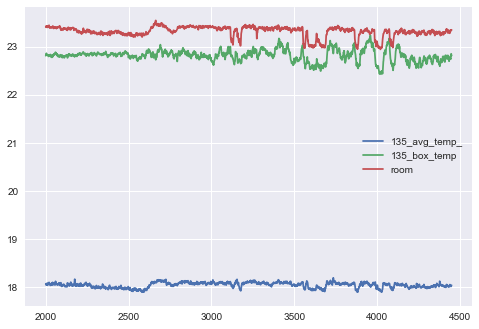

In [13]:
_df_compare_135_airON.plot()

### Graph of temperatures average values of the 133-14 and Electronic Bastidor

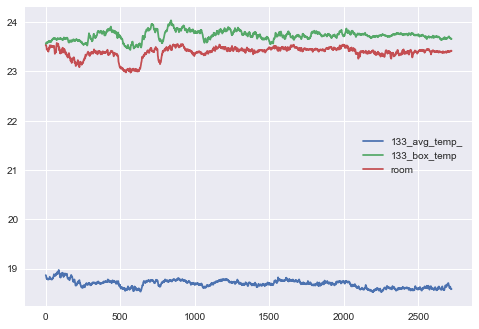

In [14]:
_df_compare_133_airON.plot()

### Graph of temperatures average values of the 134-14 and Electronic Bastidor

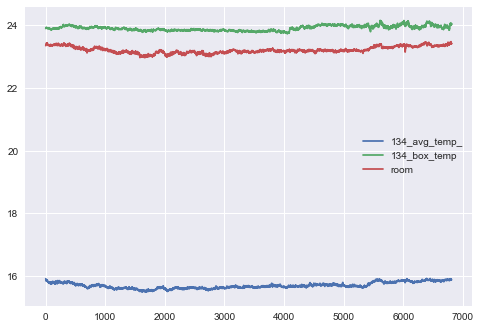

In [15]:
_df_compare_134_airON.plot()

In [16]:
#Creating overview data from describe table of the sensors
_135_overview_airON = _df_compare_135_airON.describe()
_135_overview_airON.drop(['count', '25%', '50%', '75%'], inplace=True)
_135_overview_airON.columns = ['135 sensor', '135 Box', '135 Room']

_133_overview_airON = _df_compare_133_airON.describe()
_133_overview_airON.drop(['count', '25%', '50%', '75%'], inplace=True)
_133_overview_airON.columns = ['133 sensor', '133 Box', '133 Room']

_134_overview_airON = _df_compare_134_airON.describe()
_134_overview_airON.drop(['count', '25%', '50%', '75%'], inplace=True)
_134_overview_airON.columns = ['134 sensor', '134 Box', '134 Room']

In [17]:
#Unique list of table
_list_overviews = [_135_overview_airON, _133_overview_airON, _134_overview_airON]

#Creating summary table of sensors air ON describes
_df_overall_airON_desc = pd.concat(_list_overviews, axis=1)

#_df_overall_airON_desc['unit'] = ['°C']*len(_df_overall_airON_desc)
_df_overall_airON_desc = _df_overall_airON_desc.round(3)
_df_overall_airON_desc

,135 sensor,135 Box,135 Room,133 sensor,133 Box,133 Room,134 sensor,134 Box,134 Room
mean,18.034,22.813,23.313,18.687,23.728,23.391,15.691,23.911,23.217
std,0.054,0.122,0.108,0.077,0.092,0.111,0.095,0.079,0.103
min,17.885,22.430,22.942,18.520,23.435,22.975,15.478,23.745,22.967
max,18.185,23.235,23.545,18.972,24.035,23.578,15.917,24.160,23.482


In [18]:
## Table of differences
def diff_maxmin(df):
    val = df.iloc[3]-df.iloc[2]
    return val.values

In [19]:
_val = diff_maxmin(_df_overall_airON_desc)
_diff = pd.DataFrame([_val], columns=_df_overall_airON_desc.columns)

#Applying the diff rows in overall DF
_df_overall_airON_desc = _df_overall_airON_desc.append(_diff, ignore_index=True)
_df_overall_airON_desc.index = ['mean', 'std', 'min', 'max', 'diff']
_df_overall_airON_desc

,135 sensor,135 Box,135 Room,133 sensor,133 Box,133 Room,134 sensor,134 Box,134 Room
mean,18.034,22.813,23.313,18.687,23.728,23.391,15.691,23.911,23.217
std,0.054,0.122,0.108,0.077,0.092,0.111,0.095,0.079,0.103
min,17.885,22.430,22.942,18.520,23.435,22.975,15.478,23.745,22.967
max,18.185,23.235,23.545,18.972,24.035,23.578,15.917,24.160,23.482
diff,0.300,0.805,0.603,0.452,0.600,0.603,0.439,0.415,0.515
